# **⬇️ Import Libraries**

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import cv2
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras import regularizers
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras import models,layers

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import random
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import torch
from torch import nn
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
import cv2
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras import regularizers
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras import models,layers









In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



# **📊 Exploratory Data Analysis and Preprocessing for Training Set**

Training Set Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Columns: 194 entries, id to texture64
dtypes: float64(192), int64(1), object(1)
memory usage: 1.5+ MB
None

First Few Rows of Training Set:
   id                species   margin1   margin2   margin3   margin4  \
0   1            Acer_Opalus  0.007812  0.023438  0.023438  0.003906   
1   2  Pterocarya_Stenoptera  0.005859  0.000000  0.031250  0.015625   
2   3   Quercus_Hartwissiana  0.005859  0.009766  0.019531  0.007812   
3   5        Tilia_Tomentosa  0.000000  0.003906  0.023438  0.005859   
4   6     Quercus_Variabilis  0.005859  0.003906  0.048828  0.009766   

    margin5   margin6   margin7  margin8  ...  texture55  texture56  \
0  0.011719  0.009766  0.027344      0.0  ...   0.007812   0.000000   
1  0.025391  0.001953  0.019531      0.0  ...   0.000977   0.000000   
2  0.003906  0.005859  0.068359      0.0  ...   0.154300   0.000000   
3  0.021484  0.019531  0.023438      0.0  ...   0.00

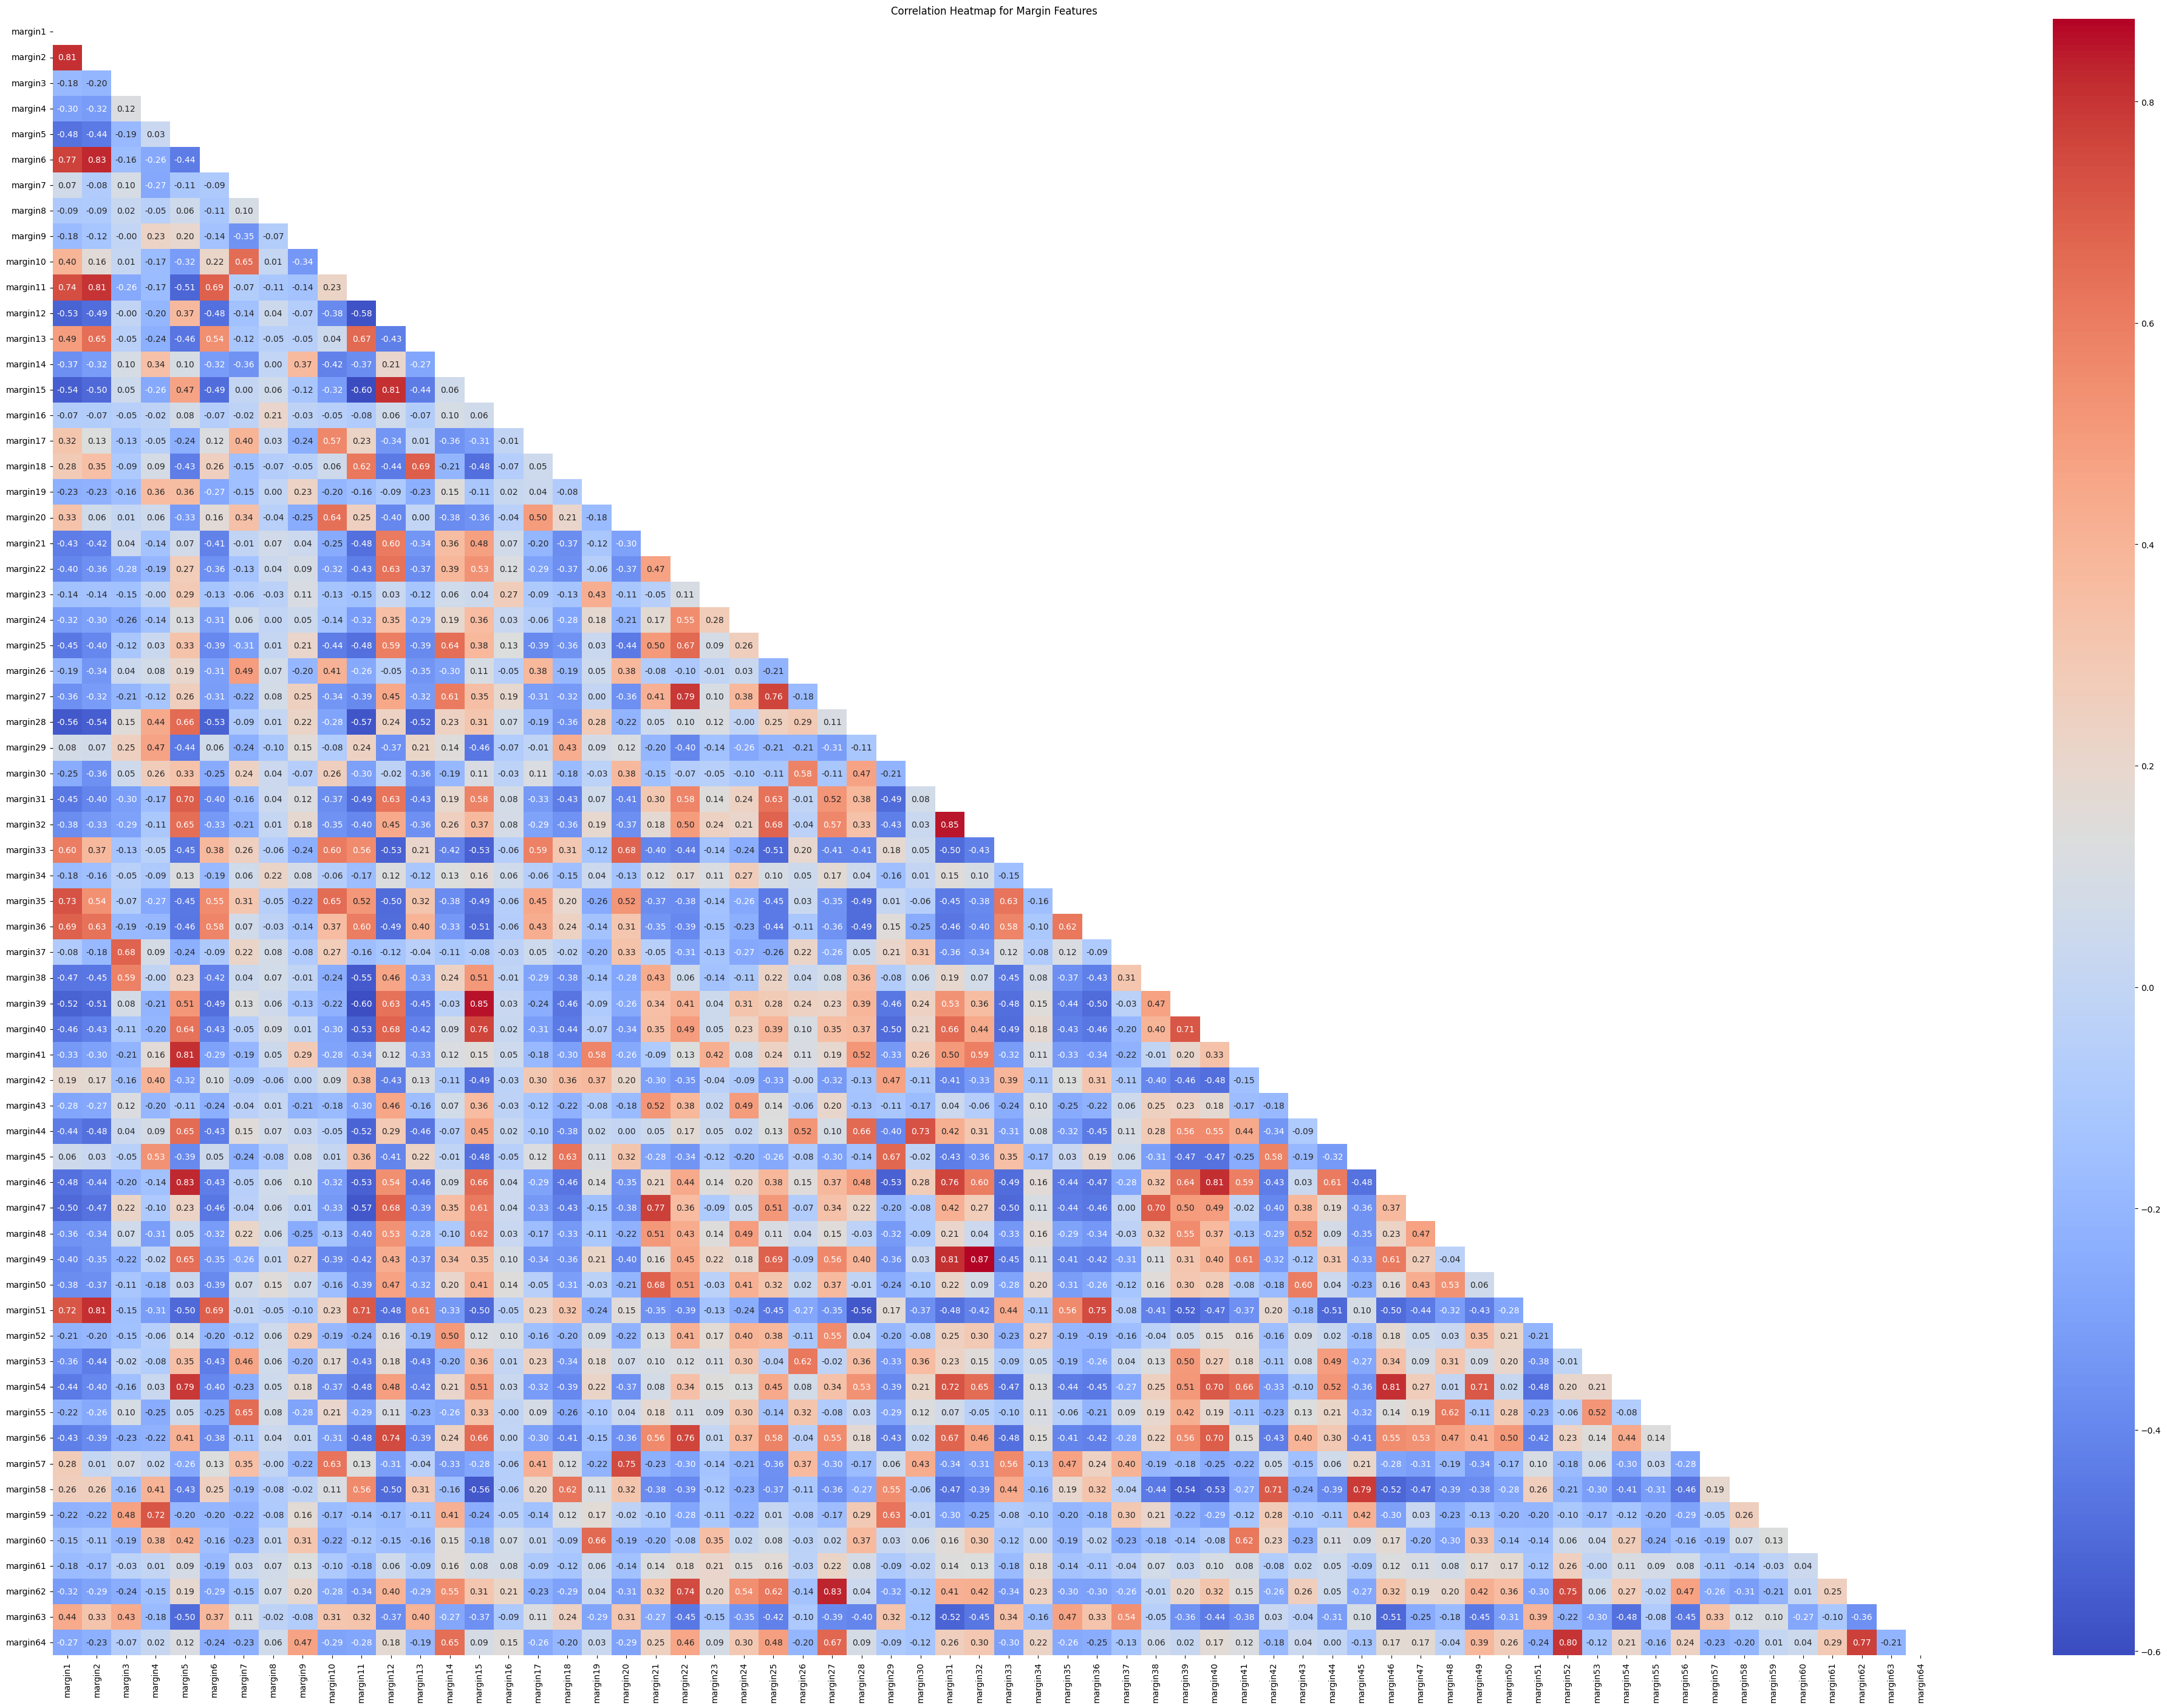

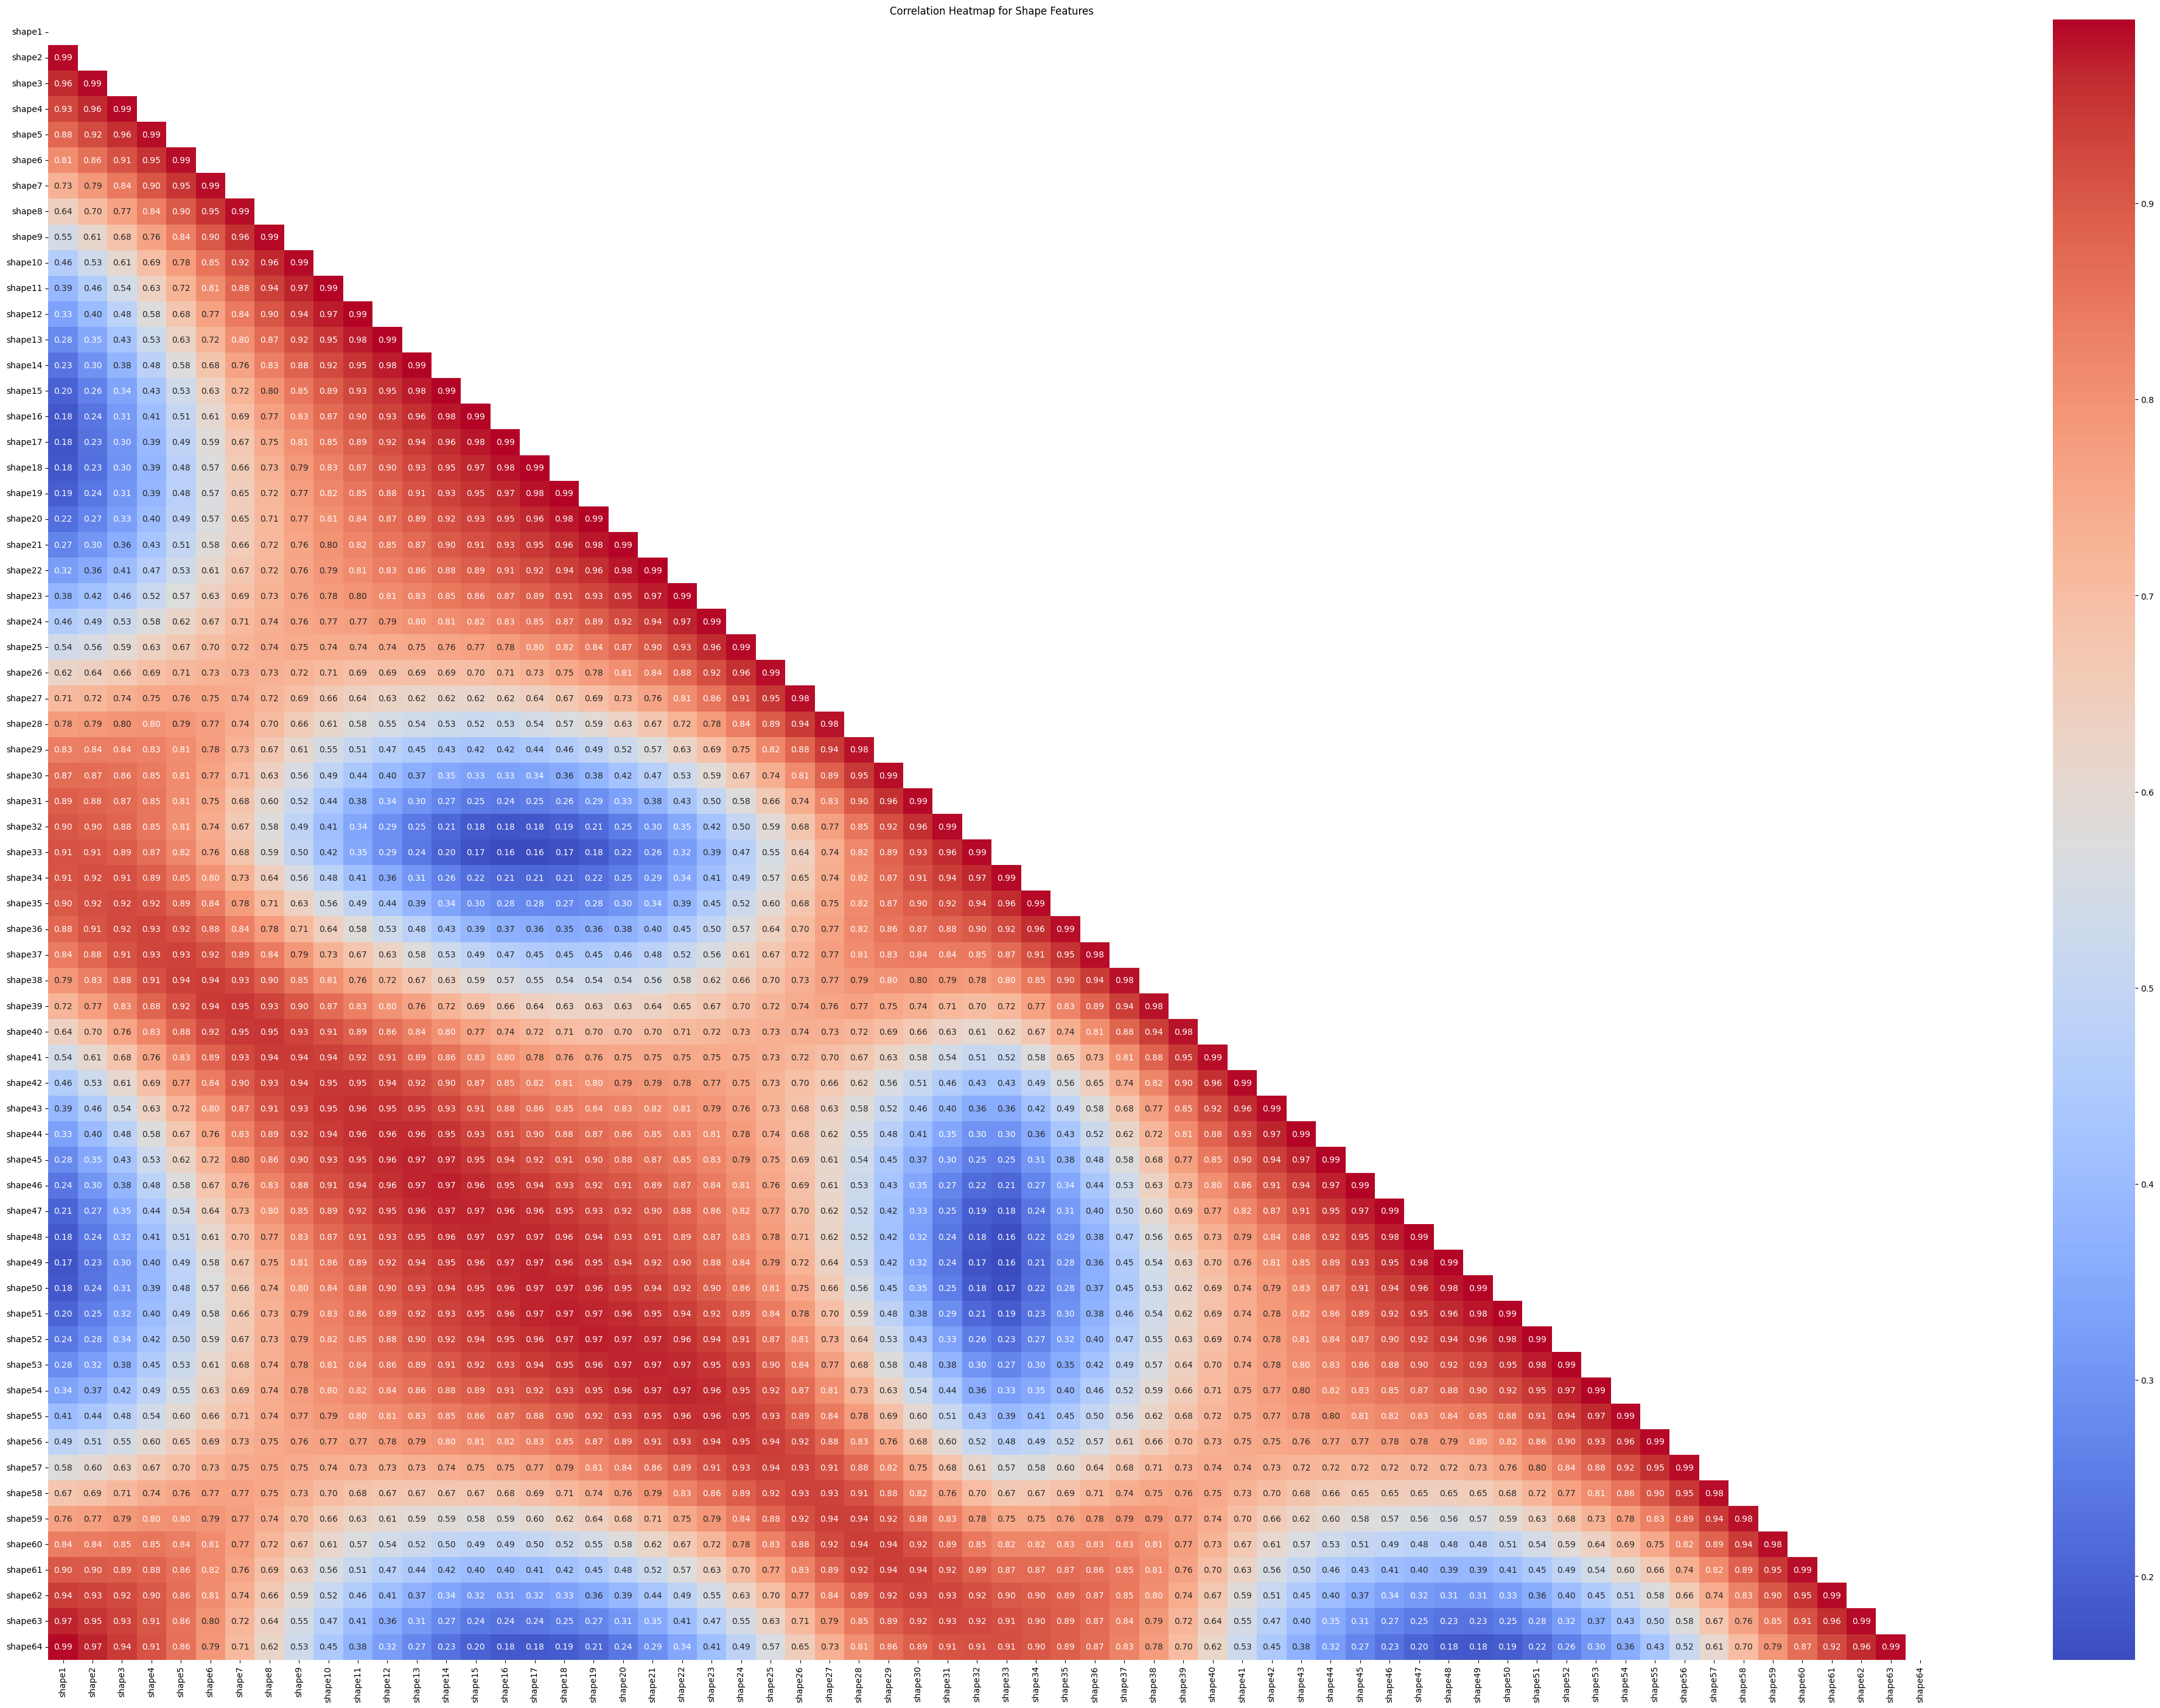

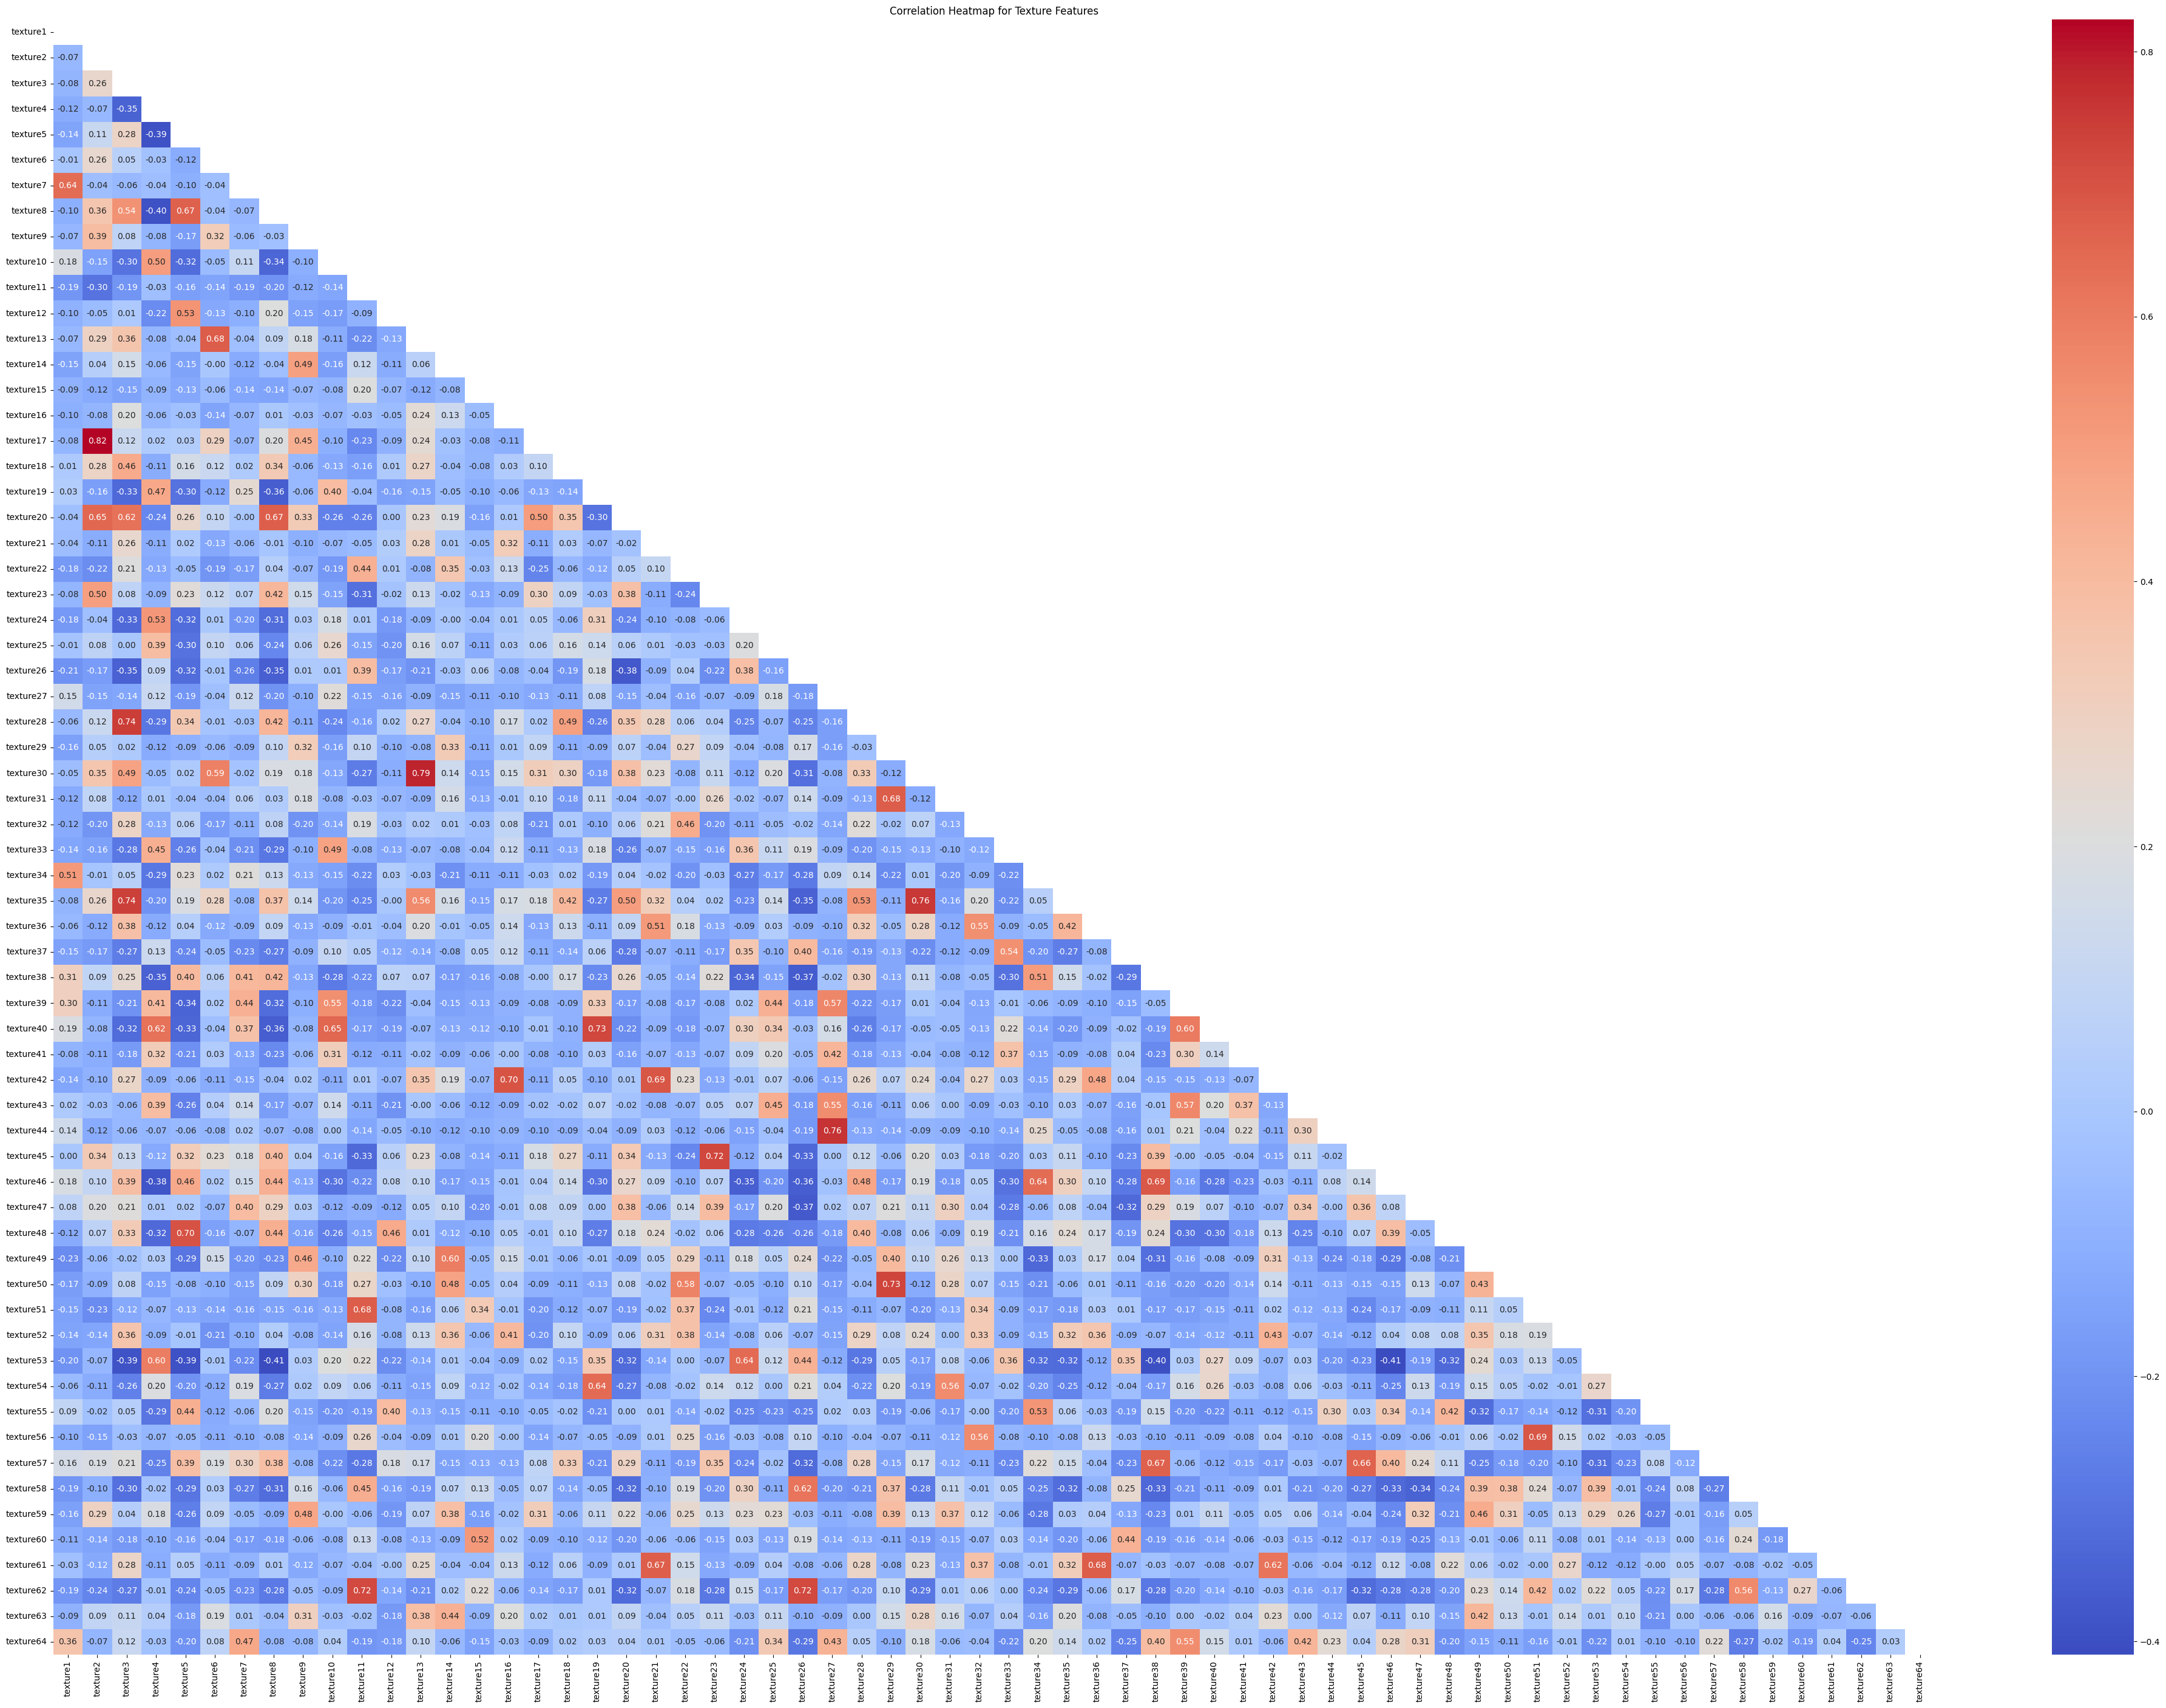


Cleaned Training Set Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 990 entries, 0 to 989
Columns: 194 entries, id to texture64
dtypes: float64(192), int64(1), object(1)
memory usage: 1.5+ MB
None


In [7]:
# Load training set data
train_df = pd.read_csv('/content/drive/MyDrive/train.csv')

# Display basic info about the dataset
print("Training Set Info:")
print(train_df.info())

# Display the first few rows of the dataset
print("\nFirst Few Rows of Training Set:")
print(train_df.head())

# Display the size of the data
print("\nThe Size:")
print(train_df.shape)

# Describe the data
print("\nThe description:")
print(train_df.describe())

# Check for missing values
missing_values = train_df.isnull().sum()
print("\nMissing Values:")
print(missing_values)

# Check for duplicates
duplicates = train_df.duplicated().sum()
print("\nDuplicate Entries:")
print(duplicates)

# Remove duplicates
train_df = train_df.drop_duplicates()

# Remove missing values
train_df = train_df.dropna()

# Separate features into margin, shape, and texture
margin_features = train_df.iloc[:, 2:66]
shape_features = train_df.iloc[:, 66:130]
texture_features = train_df.iloc[:, 130:]

# Correlation Analysis and display as a heatmap for margin features
corr_margin = margin_features.corr()

# Set the upper triangle to NaN
mask_margin = np.triu(np.ones_like(corr_margin, dtype=bool))

# Plotting the heatmap for margin features
plt.figure(figsize=(50, 35))
sns.heatmap(corr_margin, annot=True, cmap='coolwarm', fmt=".2f", mask=mask_margin)
plt.title("Correlation Heatmap for Margin Features")
plt.show()

# Correlation Analysis and display as a heatmap for shape features
corr_shape = shape_features.corr()

# Set the upper triangle to NaN
mask_shape = np.triu(np.ones_like(corr_shape, dtype=bool))

# Plotting the heatmap for shape features
plt.figure(figsize=(50, 35))
sns.heatmap(corr_shape, annot=True, cmap='coolwarm', fmt=".2f", mask=mask_shape)
plt.title("Correlation Heatmap for Shape Features")
plt.show()

# Correlation Analysis and display as a heatmap for texture features
corr_texture = texture_features.corr()

# Set the upper triangle to NaN
mask_texture = np.triu(np.ones_like(corr_texture, dtype=bool))

# Plotting the heatmap for texture features
plt.figure(figsize=(50, 35))
sns.heatmap(corr_texture, annot=True, cmap='coolwarm', fmt=".2f", mask=mask_texture)
plt.title("Correlation Heatmap for Texture Features")
plt.show()

# Display info after cleaning
print("\nCleaned Training Set Info:")
print(train_df.info())


# **📈 Visualization of Categorical Features**

<ipython-input-8-c053c71c7b33>:15: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


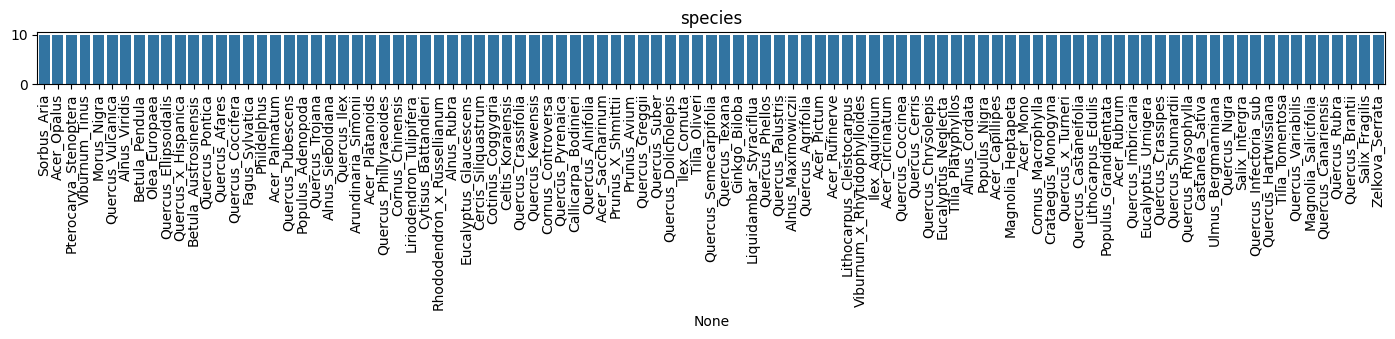

In [8]:
plt.figure(figsize=(80, 20))

columns = 4
i = 0

for col in train_df.select_dtypes('object'):
    value_counts = train_df[col].value_counts()
    num_values = len(value_counts)
    plt.subplot(int(num_values / columns + 1), columns, i + 1)
    sns.barplot(x=value_counts.index, y=value_counts.values)
    plt.xticks(rotation=90)
    plt.title(col)
    i += 1

plt.tight_layout()
plt.show()

# **🖼️ Image Dataset Exploration and Cleaning**

Number of Images: 1584


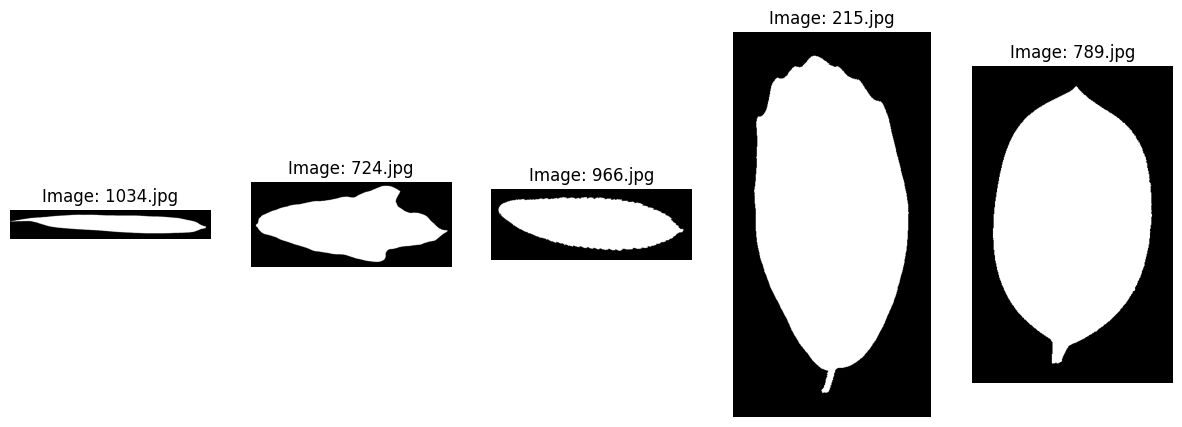


Number of Cleaned Images: 1584


In [9]:
# Path to the folder containing images
image_folder = '/content/drive/MyDrive/Leaf images'

# Get a list of all image files in the folder
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Display basic info about the dataset
print("Number of Images:", len(image_files))

# Display some random images with a colormap
plt.figure(figsize=(15, 5))
for i in range(5):  # Change 5 to the desired number of images to display
    random_image = random.choice(image_files)
    image_path = os.path.join(image_folder, random_image)
    img = Image.open(image_path)

    plt.subplot(1, 5, i + 1)
    plt.imshow(img, cmap='gray')  # Change 'gray' to your desired colormap
    plt.title(f"Image: {random_image}")
    plt.axis('off')

plt.show()

# Clean the images
# Check for corrupted images
corrupted_images = []
for image_file in image_files:
    image_path = os.path.join(image_folder, image_file)
    try:
        img = Image.open(image_path)
        img.verify()
    except (IOError, SyntaxError):
        corrupted_images.append(image_file)

# Remove corrupted images
for corrupted_image in corrupted_images:
    image_files.remove(corrupted_image)

# Display info after cleaning
print("\nNumber of Cleaned Images:", len(image_files))


### **Label Encoding and Dataset Preparation**

In [10]:
label = train_df.species
train = train_df.drop(['species','id'], axis = 1)


LabelEncoder  = preprocessing.LabelEncoder()
LabelEncoder.fit(label)
num_label = LabelEncoder.transform(label)


classes = list(LabelEncoder.classes_)
max_label = num_label.max()
min_label = num_label.min()
print(max_label)
print(min_label)


label.nunique()

98
0


99

### **Trying Alternave Classifiers to see their accuracy**

In [11]:
x_train, x_test, y_train, y_test = train_test_split(train, num_label ,test_size = 0.2,random_state = 50)

In [12]:
#computing the mean and std deviation

# gets mean and std deviation
scaler = preprocessing.StandardScaler()
xTrain = scaler.fit_transform(x_train)
xVal = scaler.transform(x_test)

print(scaler.mean_)
print(f"\n\n{scaler.scale_}")

[0.01792826 0.02964458 0.0317432  0.02317357 0.01407379 0.04043372
 0.0187396  0.00106528 0.00697389 0.01879387 0.02482339 0.01186665
 0.04259151 0.00791353 0.01535122 0.00011344 0.01510709 0.02059903
 0.0124733  0.01323532 0.01848312 0.00622184 0.00105546 0.00771627
 0.00880133 0.01853742 0.00558066 0.01533642 0.028123   0.01675933
 0.0105769  0.00952884 0.01969889 0.00105048 0.01328219 0.01832778
 0.01612312 0.03024628 0.01458921 0.0080615  0.0109838  0.0176422
 0.01883579 0.01253001 0.0247864  0.00992091 0.02455703 0.02669761
 0.00840185 0.01360031 0.02628329 0.00262877 0.02347694 0.00980503
 0.01777044 0.00588644 0.01251275 0.02070506 0.03058166 0.01191844
 0.00137598 0.00490742 0.02541033 0.0040344  0.00073736 0.00071589
 0.00069107 0.00066781 0.0006472  0.00062992 0.00061534 0.00060236
 0.00058999 0.00057912 0.00057036 0.00056196 0.00055554 0.00055091
 0.00054665 0.00054562 0.00054593 0.00054582 0.00054533 0.00054884
 0.00055582 0.00056456 0.00057535 0.00058514 0.00059679 0.00061

In [13]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
prediction = rf.predict(x_test)
print("Accuracy:", accuracy_score(y_test,prediction))

Accuracy: 0.9595959595959596


In [14]:
svc=SVC()
svc.fit(x_train,y_train)
prediction = svc.predict(x_test)
print("Accuracy:", accuracy_score(y_test,prediction))

Accuracy: 0.7777777777777778


In [16]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
prediction = logreg.predict(x_test)
print("Accuracy:", accuracy_score(y_test,prediction))

Accuracy: 0.12626262626262627


## **Image Preprocessing and Label Extraction**

In [23]:
# Path to the folder containing the numbered images
image_folder = '/content/drive/MyDrive/Leaf images'

# Path to the CSV file
csv_file_path = '/content/drive/MyDrive/train.csv'

# Read the CSV file
df = pd.read_csv(csv_file_path)

# Function to load and parse images
def load_images_and_labels(image_folder, df, max_size=(1620, 1050), target_size=(244,244)):
    data = []
    labels = []

    for index, row in df.iterrows():
        image_id = row['id']
        species = row['species']

        # Construct the image file path based on the ID
        image_path = os.path.join(image_folder, f"{image_id}.jpg")

        # Load the image using OpenCV in grayscale mode
        #image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)


        # Resize the image to the max size with replicated padding
        height, width = image.shape
        new_height, new_width = max_size

        # Calculate padding
        pad_height = max(0, (new_height - height) // 2)
        pad_width = max(0, (new_width - width) // 2)

        # Replicate padding
        image = cv2.copyMakeBorder(image, pad_height, pad_height, pad_width, pad_width, cv2.BORDER_REPLICATE)


        # Resize the image to the target size
        new_height, new_width = target_size

        image = cv2.resize(image, (new_width, new_height))

        # Convert OpenCV image to TensorFlow tensor
        numpy_array = np.array(image)

         # Append the image and label to the lists
        data.append(numpy_array)
        labels.append(species)

    return data,labels

# Load images and labels
images,labels = load_images_and_labels(image_folder, df, max_size=(1620, 1050), target_size=(244,244))



In [24]:
updated_labels = np.array(labels)
updated_images= np.array(images)

In [25]:
print(updated_images.shape)
print(updated_labels.shape)

(990, 244, 244)
(990,)


In [26]:
updated_images= updated_images.reshape(len(updated_images),244,244,1)
updated_labels= updated_labels.reshape(len(updated_labels),1)

In [27]:
print(updated_images.shape)
print(updated_labels.shape)

(990, 244, 244, 1)
(990, 1)


In [28]:
LabelEncoder  = preprocessing.LabelEncoder()
LabelEncoder.fit(updated_labels)
num_labels = LabelEncoder.transform(updated_labels)



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


# **⚙️ Model Training**

In [49]:
from keras import models, layers, regularizers

network = models.Sequential()

# First Convolutional layer with (3,3) matrix size, same padding refers to add additional columns or rows to align
# with the filter and a maxpooling layers which takes maximum value in the (3,3) pixel value matrix.
network.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(244, 244, 1)))
network.add(layers.MaxPool2D((2,2)))  # Reduced the pool size to (2,2) to reduce aggressive downsampling
network.add(layers.Dropout(0.25))  # Dropout layer with 25% dropout rate

# Second convolutional layer with 64 filters
network.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
network.add(layers.MaxPool2D((2,2)))
network.add(layers.Dropout(0.25))  # Dropout layer with 25% dropout rate

# Third convolutional layer with 128 filters
network.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
network.add(layers.MaxPool2D((2,2)))
network.add(layers.Dropout(0.25))  # Dropout layer with 25% dropout rate

# Fourth convolutional layer with 256 filters
network.add(layers.Conv2D(256, (3,3), padding='same', activation='relu'))
network.add(layers.MaxPool2D((2,2)))
network.add(layers.Dropout(0.25))  # Dropout layer with 25% dropout rate

# Flatten layer
network.add(layers.Flatten())

# Dense layer of 512 neurons with ReLU activation function and L2 regularization
network.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
network.add(layers.Dropout(0.2))  # Dropout layer with 20% dropout rate

# Final Dense Layer with number of neurons same as number of classes of classification and 'softmax' as the
# activation function
network.add(layers.Dense(99, activation='softmax'))


### **Compiling the network**

In [50]:
network.compile(optimizer='adam',
                loss=CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(updated_images, num_labels, test_size=0.2, random_state=5, shuffle=True)


In [52]:
from tensorflow.keras.utils import to_categorical
Y_train_one_hot = to_categorical(Y_train, num_classes = 99)

In [53]:
train_results = network.fit(X_train, Y_train_one_hot, epochs=50, batch_size=8, verbose=1)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


99/99 [==============================] - 10s 38ms/step - loss: 19.1444 - accuracy: 0.0922
Epoch 2/50
99/99 [==============================] - 4s 39ms/step - loss: 7.3093 - accuracy: 0.3220
Epoch 3/50
99/99 [==============================] - 4s 37ms/step - loss: 5.7828 - accuracy: 0.4747
Epoch 4/50
99/99 [==============================] - 4s 37ms/step - loss: 4.9206 - accuracy: 0.5593
Epoch 5/50
99/99 [==============================] - 4s 38ms/step - loss: 4.3000 - accuracy: 0.5896
Epoch 6/50
99/99 [==============================] - 4s 38ms/step - loss: 3.6982 - accuracy: 0.6667
Epoch 7/50
99/99 [==============================] - 4s 37ms/step - loss: 3.4099 - accuracy: 0.6692
Epoch 8/50
99/99 [==============================] - 4s 37ms/step - loss: 2.9719 - accuracy: 0.7374
Epoch 9/50
99/99 [==============================] - 4s 38ms/step - loss: 2.8349 - accuracy: 0.7273
Epoch 10/50
99/99 [==============================] - 4s 37ms/step - loss: 2.5314 - accuracy: 0.7816
Epoch 11/50
99/99 